In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [14]:
parent_dir = os.path.dirname(os.getcwd())
file = os.path.join(parent_dir, 'Analysis_Performance.xlsx')
evaluation_data = pd.read_excel(file)
evaluation_data


,test,Rounds_played,guesses_red_correct,guesses_red_incorrect_black,guesses_red_incorrect_neutral,guesses_red_incorrect_opponent,guesses_red_incorrect_invalid,guesses_blue_correct,guesses_blue_incorrect_black,guesses_blue_incorrect_neutral,guesses_blue_incorrect_opponent,guesses_blue_incorrect_invalid,winner,majority,precision_red,precision_blue
0,baseline,10.090909,6.090909,0.090909,1.636364,1.545455,0.090909,5.090909,0.272727,1.181818,1.363636,0.090909,BLUE,54.545455,0.644231,0.636364
1,riskavoiding,11.363636,5.545455,0.090909,0.818182,0.545455,0.000000,5.727273,0.454545,1.636364,1.363636,0.090909,RED,63.636364,0.792208,0.617647
2,balanced,8.818182,5.818182,0.181818,1.090909,1.090909,0.090909,4.545455,0.181818,1.090909,1.272727,0.000000,BLUE,54.545455,0.703297,0.641026
3,riskaffine,8.727273,6.000000,0.272727,1.363636,0.727273,0.181818,4.636364,0.090909,1.181818,1.000000,0.090909,BLUE,54.545455,0.702128,0.662338
4,male,8.454545,5.727273,0.181818,1.000000,1.272727,0.181818,4.363636,0.181818,1.454545,0.636364,0.000000,BLUE,63.636364,0.684783,0.657534
5,female,7.272727,5.000000,0.272727,0.727273,1.000000,0.000000,3.181818,0.272727,0.818182,1.181818,0.000000,RED,54.545455,0.714286,0.583333
6,white,7.181818,5.090909,0.363636,0.909091,0.818182,0.000000,4.090909,0.272727,0.636364,0.545455,0.181818,RED,54.545455,0.708861,0.714286
7,black,7.272727,5.363636,0.090909,0.909091,1.000000,0.000000,4.363636,0.272727,0.909091,0.545455,0.181818,RED,54.545455,0.728395,0.695652
8,asian,9.090909,5.545455,0.181818,1.272727,1.363636,0.000000,4.818182,0.272727,1.090909,1.363636,0.181818,RED,54.545455,0.663043,0.623529
9,oneshot,10.090909,5.636364,0.090909,1.272727,0.727273,0.272727,5.727273,0.090909,0.909091,1.454545,0.000000,BLUE,63.636364,0.704545,0.700000


### For the evaluation, we ran 10 games per game setting. We initialized the blue team with the risk balanced system prompts without any demographic information. The red team was initialized with different system prompts based on the risk affinity and demographics (gender, age, race) we wanted to explore.  


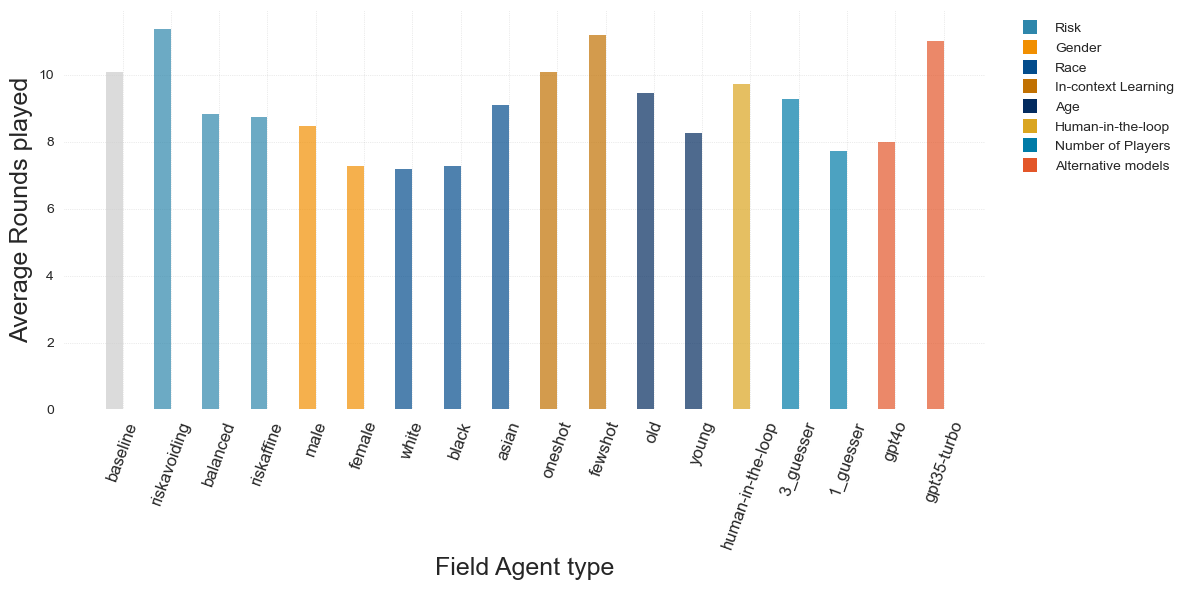

In [15]:
evaluation_data.loc[evaluation_data['test'].isin(['riskavoiding', 'balanced', 'riskaffine']), 'group'] = 'risk'
evaluation_data.loc[evaluation_data['test'].isin(['female', 'male']), 'group'] = 'gender'
evaluation_data.loc[evaluation_data['test'].isin(['white', 'black', 'asian']), 'group'] = 'race'
evaluation_data.loc[evaluation_data['test'].isin(['oneshot', 'fewshot']), 'group'] = 'in-context learning'
evaluation_data.loc[evaluation_data['test'].isin(['old', 'young']), 'group'] = 'age'
evaluation_data.loc[evaluation_data['test'].isin(['human']), 'group'] = 'human-in-the-loop'
evaluation_data.loc[evaluation_data['test'].isin(['3_guesser', '1_guesser']), 'group'] = 'number of players'
evaluation_data.loc[evaluation_data['test'].isin(['gpt4o_baseline', 'gpt35-turbo_baseline']), 'group'] = 'alternative models'

evaluation_data['test'] = evaluation_data['test'].replace({'gpt4o_baseline': 'gpt4o'})
evaluation_data['test'] = evaluation_data['test'].replace({'gpt35-turbo_baseline': 'gpt35-turbo'})
evaluation_data['test'] = evaluation_data['test'].replace({'human': 'human-in-the-loop'})
# Create plot
plt.figure(figsize=(12,6), facecolor='white')
plt.style.use('seaborn')
ax = plt.gca()
ax.set_facecolor('white')

color_dict = {
    'risk': '#2E86AB',  
    'gender': '#F18F01',  
    'race': '#034C8C',  
    'in-context learning': '#C17102',  
    'age': '#032b5f',  
    'number of players': '#007BA7',
    'alternative models': '#e35629',
    'human-in-the-loop': '#DAA520',
    'NaN': '#CCCCCC'  
}

colors = evaluation_data['group'].fillna('NaN').map(color_dict)

bar_width = 0.35
x = range(len(evaluation_data))
plt.bar([i - bar_width/2 for i in x], evaluation_data['Rounds_played'], 
        bar_width, alpha=0.7, color=colors)

plt.xlabel('Field Agent type', fontsize=18)
plt.ylabel('Average Rounds played', fontsize=18)
plt.xticks(x, evaluation_data['test'], rotation=70, fontsize=12)


legend_labels = ['Risk', 'Gender', 'Race', 'In-context Learning', 'Age', 'Human-in-the-loop', 'Number of Players', 'Alternative models']
legend_colors = [color_dict['risk'], color_dict['gender'], color_dict['race'], 
                color_dict['in-context learning'], color_dict['age'], color_dict['human-in-the-loop'],
                color_dict['number of players'], color_dict['alternative models']]
[plt.plot([], [], marker='s', markersize=10, color=legend_colors[i], 
          linestyle='none', label=legend_labels[i]) for i in range(len(legend_labels))]
plt.legend(bbox_to_anchor=(1.02, 1),loc='upper left')
plt.grid(axis='y', color='gray', linestyle=':', linewidth=0.5, alpha=0.3)
plt.grid(axis='x', color='gray', linestyle=':', linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Comparing right guesses and wrong guesses per Player

In [16]:
# create column in data frame for normalized values
evaluation_data['Overall_Guesses']= evaluation_data['guesses_red_incorrect_black']+ evaluation_data['guesses_red_correct']+ evaluation_data['guesses_red_incorrect_neutral']+ evaluation_data['guesses_red_incorrect_opponent']+ evaluation_data['guesses_red_incorrect_invalid']
evaluation_data['perc_incorrect_black']=evaluation_data['guesses_red_incorrect_black']/evaluation_data['Overall_Guesses']
evaluation_data['perc_incorrect_opponent']=evaluation_data['guesses_red_incorrect_opponent']/evaluation_data['Overall_Guesses']
evaluation_data['perc_incorrect_invalid']=evaluation_data['guesses_red_incorrect_invalid']/evaluation_data['Overall_Guesses']
evaluation_data['perc_incorrect_neutral']=evaluation_data['guesses_red_incorrect_neutral']/evaluation_data['Overall_Guesses']


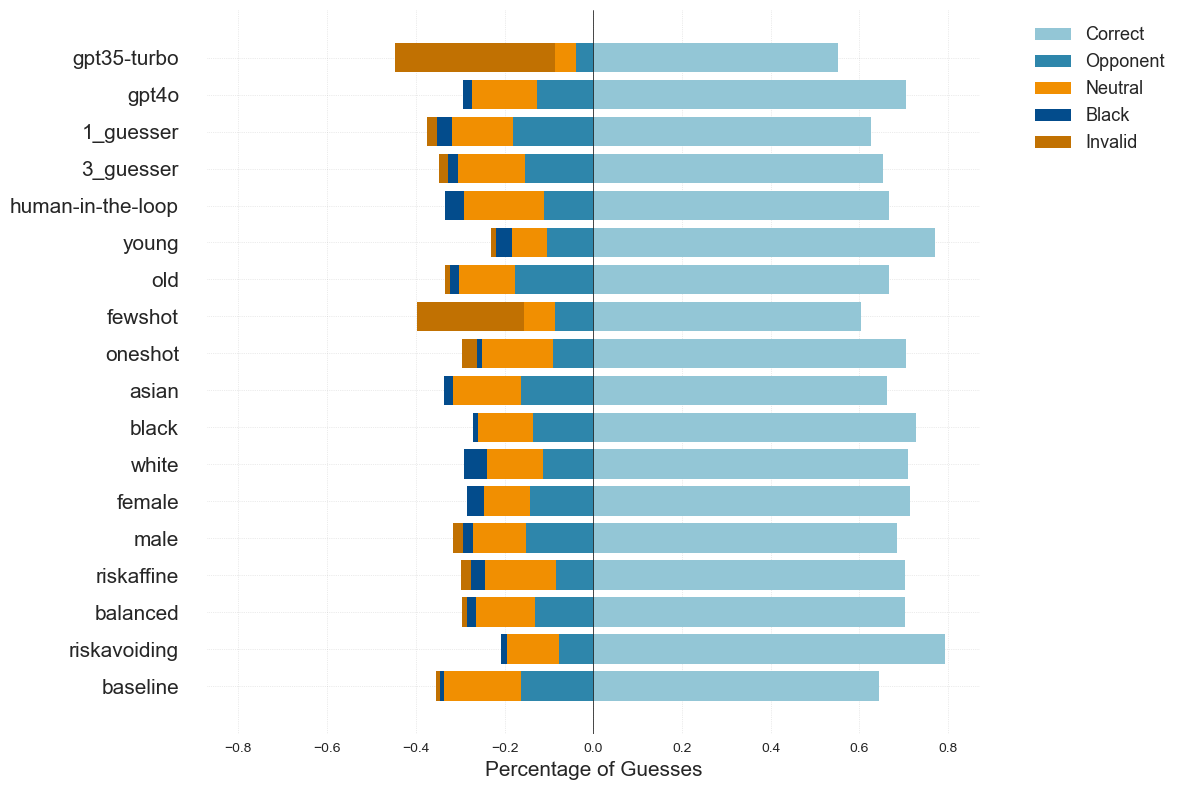

In [17]:

# right bars: correct guesses, left stacked bars: wrong guesses composition
fig, ax = plt.subplots(figsize=(12, 8), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

configurations = evaluation_data['test']
y_pos = np.arange(len(configurations))

ax.barh(y_pos, evaluation_data['precision_red'], 
        color='#93C6D6',  
        label='Correct')

opponent = -evaluation_data['perc_incorrect_opponent']
neutral = -evaluation_data['perc_incorrect_neutral']
black = -evaluation_data['perc_incorrect_black']
invalid = -evaluation_data['perc_incorrect_invalid']

ax.barh(y_pos, opponent, color='#2E86AB', label='Opponent')
ax.barh(y_pos, neutral, left=opponent, color='#F18F01', label='Neutral')
ax.barh(y_pos, black, left=opponent+neutral, color='#034C8C', label='Black')
ax.barh(y_pos, invalid, left=opponent+neutral+black, color='#C17102', label='Invalid')

ax.set_yticks(y_pos)
ax.set_yticklabels(configurations, fontsize = 15)
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

max_value = max(
    evaluation_data['precision_red'].max(),
    abs((opponent + neutral + black + invalid).min())
)

ax.set_xlim(-max_value*1.1, max_value*1.1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(axis='x', linestyle='--', alpha=0.7)

ax.set_xlabel('Percentage of Guesses', fontsize=15)

ax.tick_params(axis='y', which='major', pad=20)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=13)

plt.grid(axis='y', color='gray', linestyle=':', linewidth=0.5, alpha=0.3)
plt.grid(axis='x', color='gray', linestyle=':', linewidth=0.5, alpha=0.3)

plt.tight_layout()

plt.show()



### Win Rate 

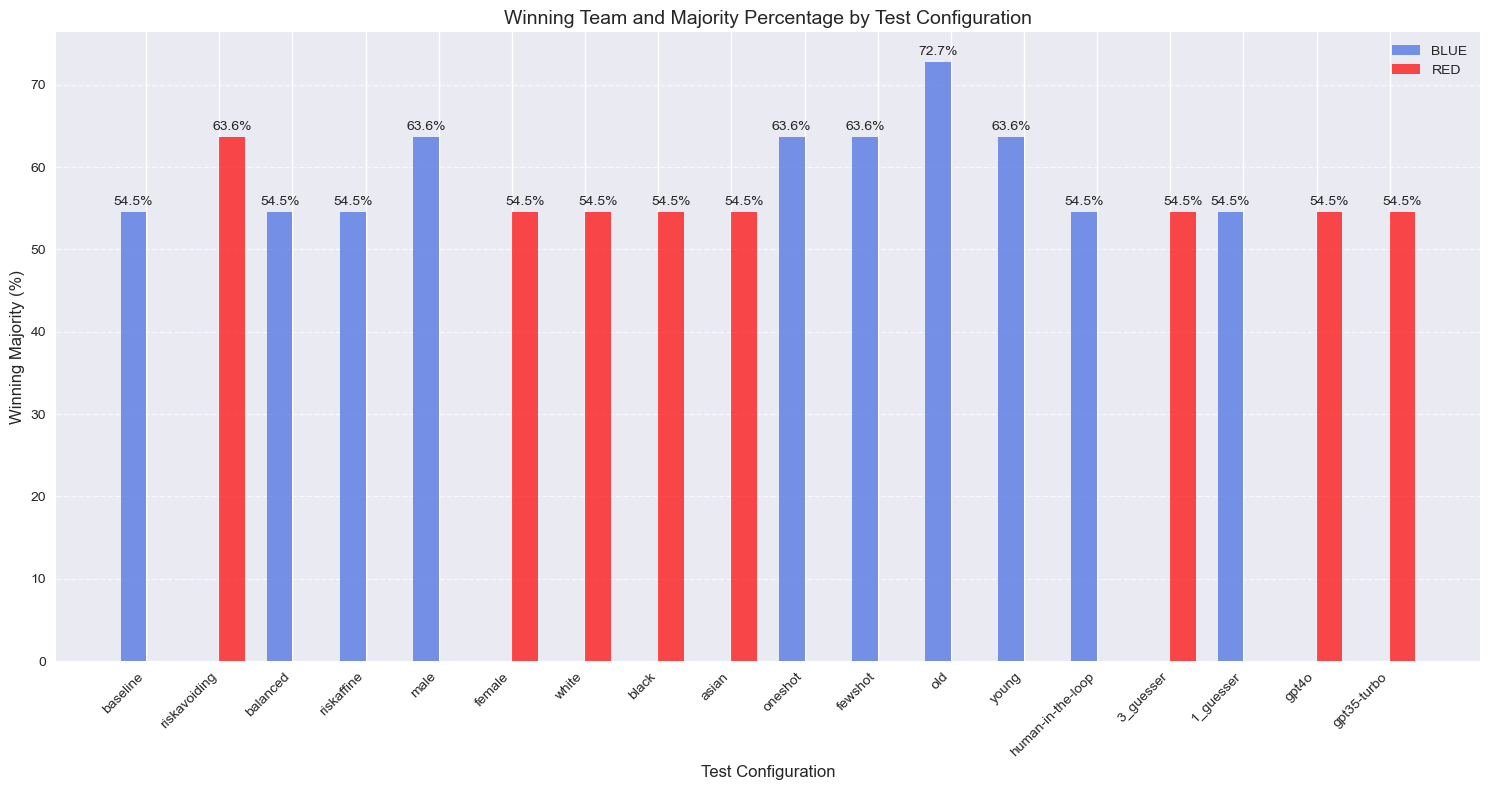

In [18]:
# Assuming evaluation_data is your DataFrame
fig, ax = plt.subplots(figsize=(15, 8))

# Get unique test configurations
tests = evaluation_data['test'].unique()
x = np.arange(len(tests))
width = 0.35

# Create bars for BLUE and RED wins
blue_mask = evaluation_data['winner'] == 'BLUE'
red_mask = evaluation_data['winner'] == 'RED'

blue_bars = ax.bar(x[blue_mask] - width/2, 
                  evaluation_data[blue_mask]['majority'],
                  width, label='BLUE', color='royalblue', alpha=0.7)
red_bars = ax.bar(x[red_mask] + width/2, 
                  evaluation_data[red_mask]['majority'],
                  width, label='RED', color='red', alpha=0.7)

# Customize the plot
ax.set_ylabel('Winning Majority (%)', fontsize=12)
ax.set_xlabel('Test Configuration', fontsize=12)
ax.set_title('Winning Team and Majority Percentage by Test Configuration', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(tests, rotation=45, ha='right')
ax.legend()

# Add grid for better readability
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                   xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom')

autolabel(blue_bars)
autolabel(red_bars)

plt.tight_layout()
plt.show()

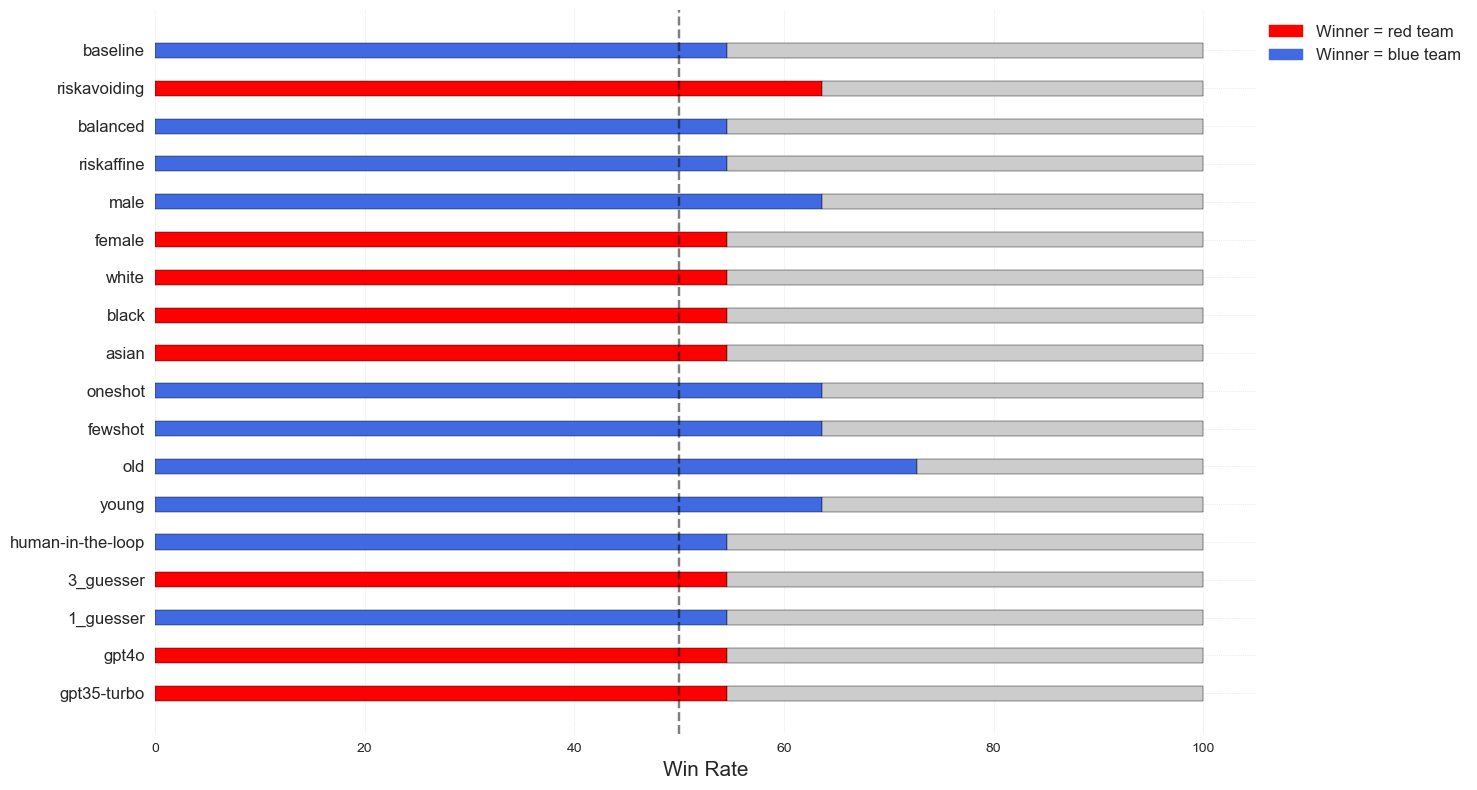

In [19]:

import matplotlib.patches as mpatches

# minority
evaluation_data['minority'] = 100 - evaluation_data['majority']

fig, ax = plt.subplots(figsize=(15, 8), facecolor='white')
plt.style.use('seaborn')
ax = plt.gca()
ax.set_facecolor('white')

tests = evaluation_data['test']
x = np.arange(len(tests))
width = 0.4

majority_colors = np.where(evaluation_data['winner'] == 'RED', 'red', 'royalblue')
minority_colors = '#CCCCCC'

ax.barh(x, evaluation_data['majority'], color=majority_colors, edgecolor='black',
        height=width)
ax.barh(x, evaluation_data['minority'], left=evaluation_data['majority'], 
        color=minority_colors, edgecolor='black', height=width)

# reference line
ax.axvline(x=50, color='black', linestyle='--', alpha=0.5)

ax.set_yticks(x)
ax.set_yticklabels(tests, fontsize = 12)
ax.invert_yaxis()
ax.set_xlabel('Win Rate', fontsize=15)
#ax.set_title('Majority Winning Team by Configuration (=red team)', fontsize=16)

red_patch = mpatches.Patch(color='red', label='Winner = red team')
blue_patch = mpatches.Patch(color='royalblue', label='Winner = blue team')
plt.legend(handles=[red_patch, blue_patch], fontsize=12, loc='upper right', bbox_to_anchor=(1.2, 1))
# Grid
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
plt.grid(axis='y', color='gray', linestyle=':', linewidth=0.5, alpha=0.3)
plt.grid(axis='x', color='gray', linestyle=':', linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

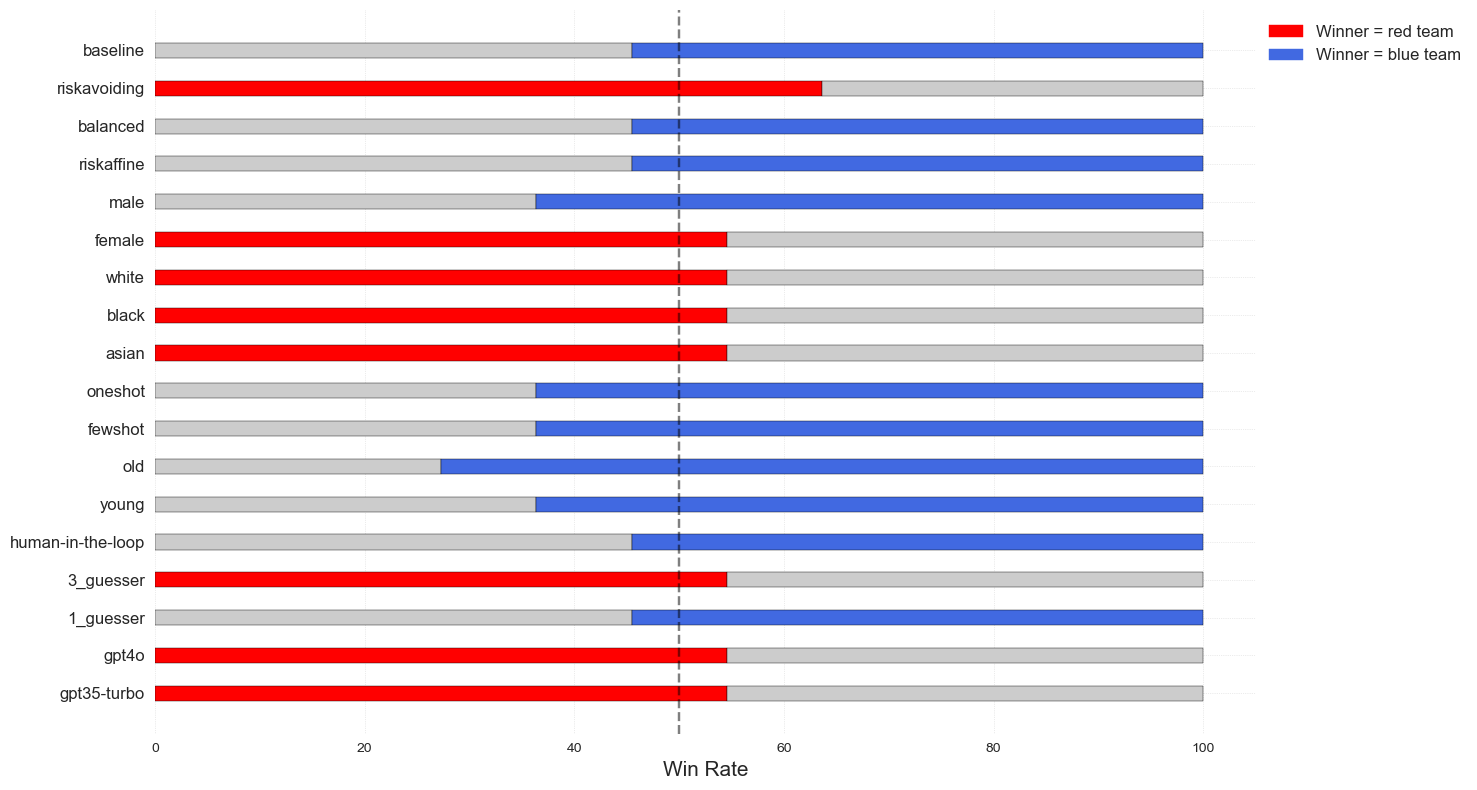

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(15, 8), facecolor='white')
plt.style.use('seaborn')
ax = plt.gca()
ax.set_facecolor('white')

x = np.arange(len(evaluation_data['test']))
width = 0.4

for i, (winner, majority) in enumerate(zip(evaluation_data['winner'], evaluation_data['majority'])):
    minority = 100 - majority
    
    if winner == 'RED':
        
        ax.barh(i, majority, color='red', edgecolor='black', height=width)
        ax.barh(i, minority, left=majority, color='#CCCCCC', edgecolor='black', height=width)
    else:
        
        ax.barh(i, minority, color='#CCCCCC', edgecolor='black', height=width)
        ax.barh(i, majority, left=minority, color='royalblue', edgecolor='black', height=width)

# Reference line
ax.axvline(x=50, color='black', linestyle='--', alpha=0.5)

ax.set_yticks(x)
ax.set_yticklabels(evaluation_data['test'], fontsize=12)
ax.invert_yaxis()
ax.set_xlabel('Win Rate', fontsize=15)

red_patch = mpatches.Patch(color='red', label='Winner = red team')
blue_patch = mpatches.Patch(color='royalblue', label='Winner = blue team')
plt.legend(handles=[red_patch, blue_patch], fontsize=12, 
          loc='upper right', bbox_to_anchor=(1.2, 1))

ax.xaxis.grid(True, linestyle='--', alpha=0.7)
plt.grid(axis='y', color='gray', linestyle=':', linewidth=0.5, alpha=0.3)
plt.grid(axis='x', color='gray', linestyle=':', linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()